In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Load The Data

In [ ]:
df = pd.read_csv('./StudentPerformanceFactors.csv')

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# Handle Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

# Visualize Missing Values

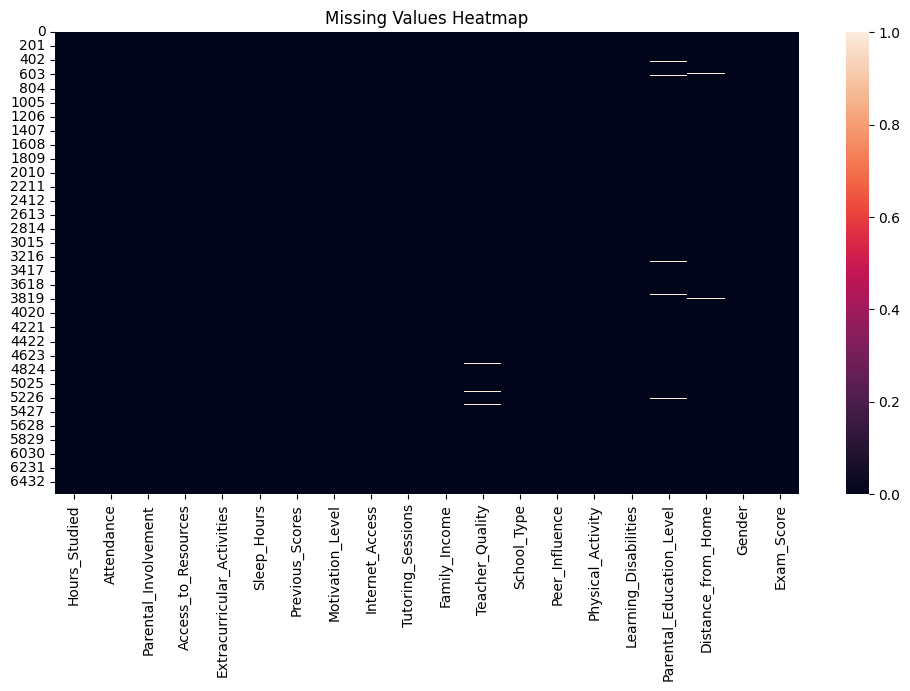

In [8]:
# Visual heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.title("Missing Values Heatmap")
plt.show()

# Fill The Missing Values(Numerical/Categorical)

In [9]:
# For numerical: fill with mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# For categorical: fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Visualize After Fill the Missing Values

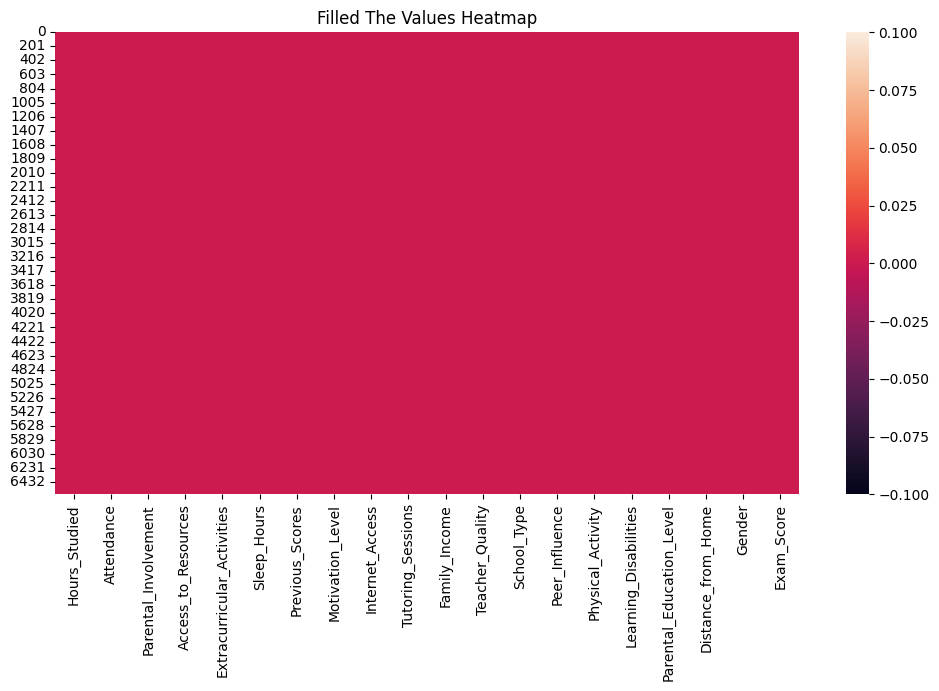

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.title("Filled The Values Heatmap")
plt.show()

# Check for Duplicates

In [11]:
df.duplicated().sum()
df = df.drop_duplicates()

# Visualize Numeric Distributions

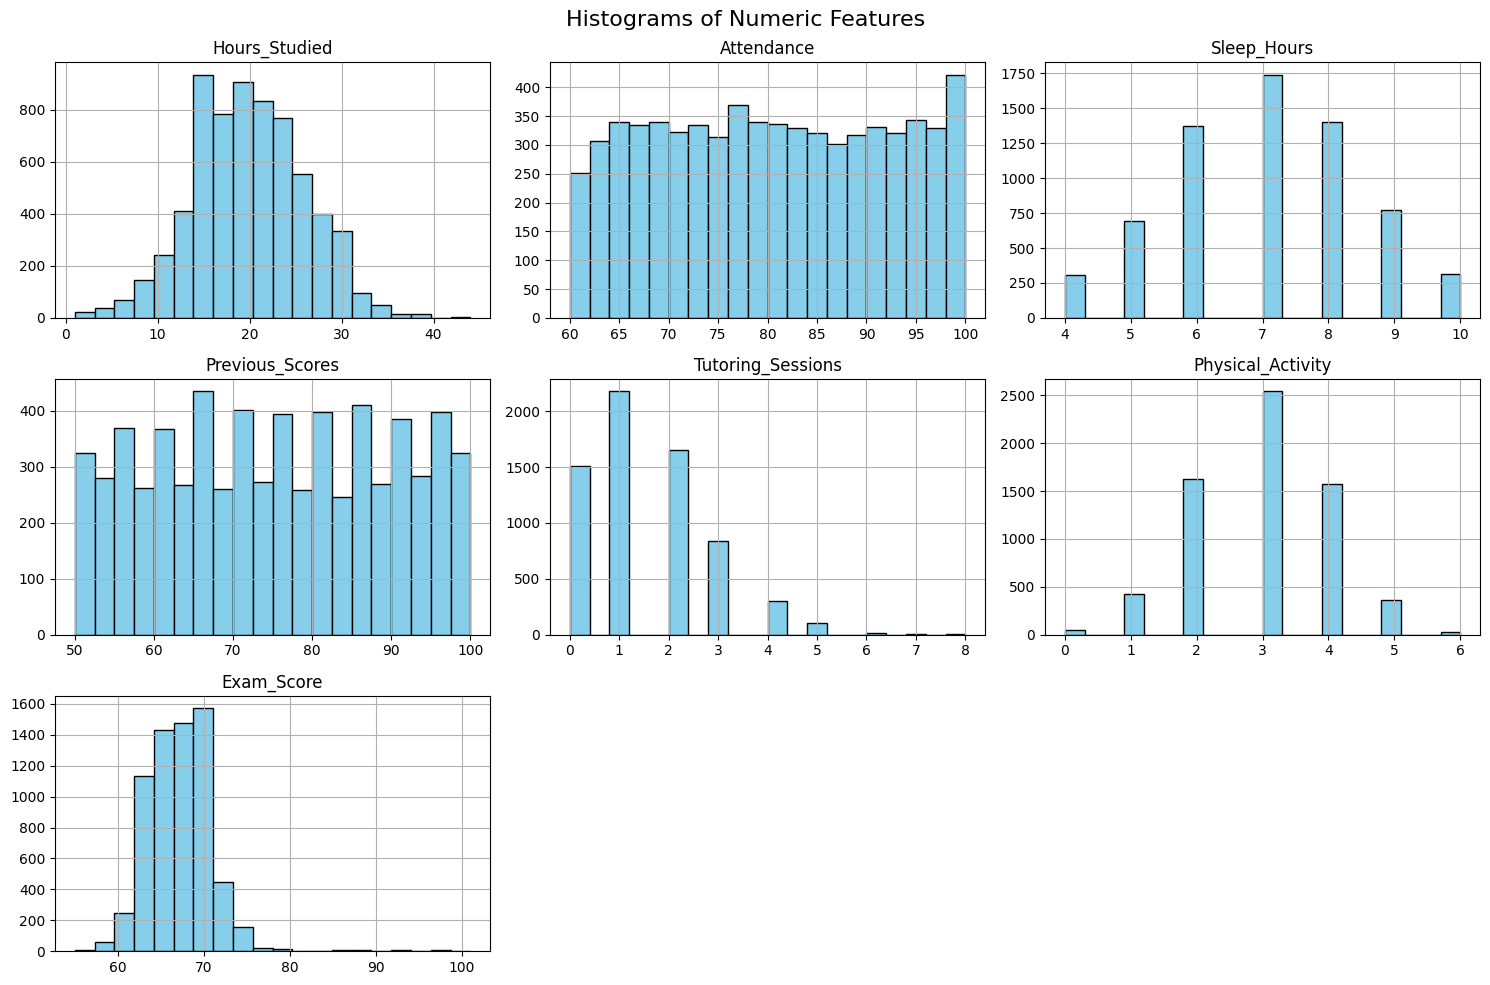

In [12]:
numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 
                'Previous_Scores', 'Tutoring_Sessions', 
                'Physical_Activity', 'Exam_Score']

df[numeric_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# Categorical Feature Overview

In [13]:
# Check unique values of each categorical feature
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

Parental_Involvement: ['Low' 'Medium' 'High']
Access_to_Resources: ['High' 'Medium' 'Low']
Extracurricular_Activities: ['No' 'Yes']
Motivation_Level: ['Low' 'Medium' 'High']
Internet_Access: ['Yes' 'No']
Family_Income: ['Low' 'Medium' 'High']
Teacher_Quality: ['Medium' 'High' 'Low']
School_Type: ['Public' 'Private']
Peer_Influence: ['Positive' 'Negative' 'Neutral']
Learning_Disabilities: ['No' 'Yes']
Parental_Education_Level: ['High School' 'College' 'Postgraduate']
Distance_from_Home: ['Near' 'Moderate' 'Far']
Gender: ['Male' 'Female']


# Plot bar charts of the categorical features

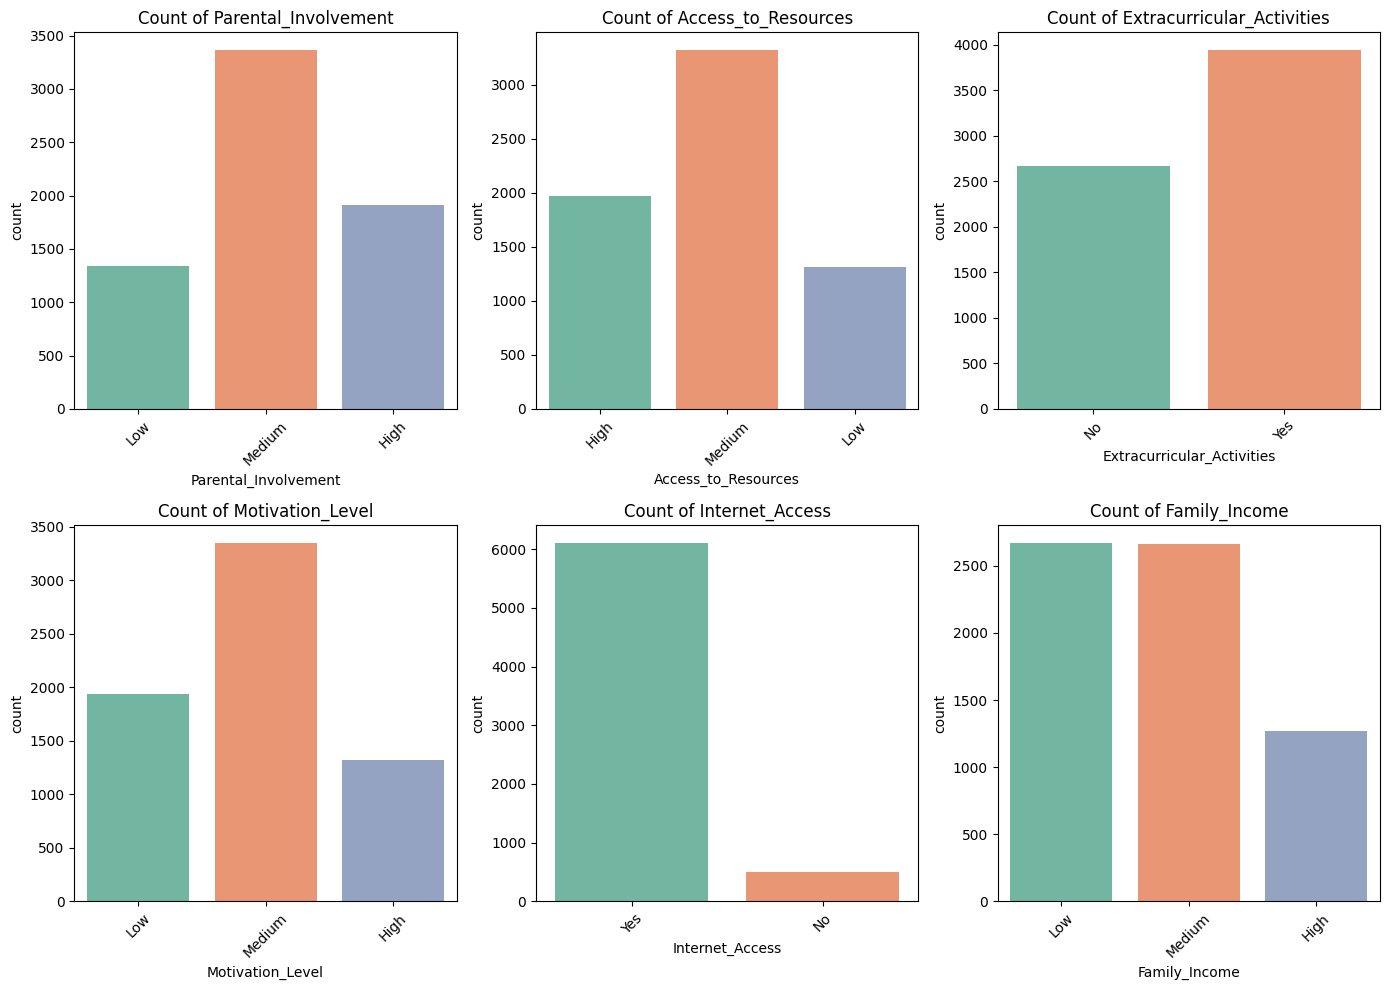

In [14]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols[:6]):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

# Correlation Heatmap (Numerical Only)

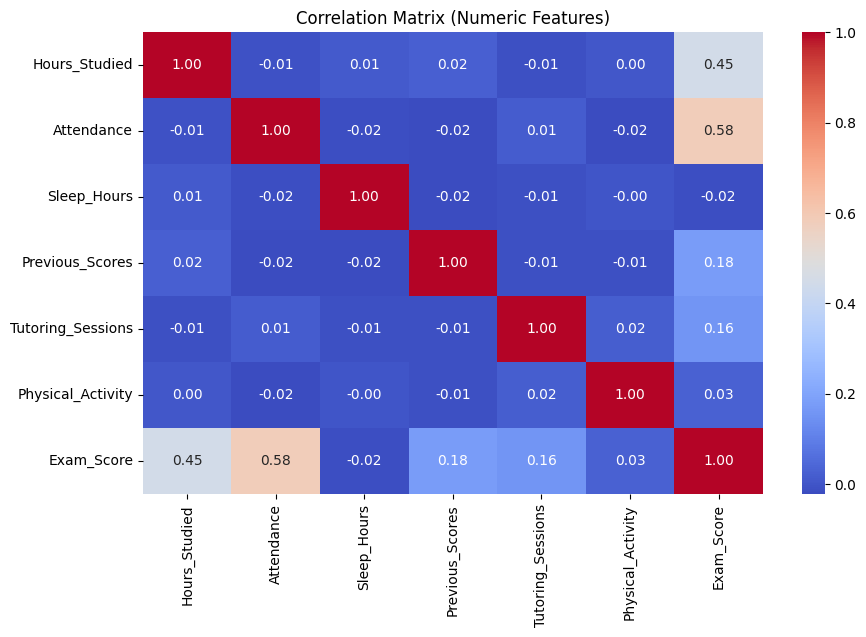

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# Target Variable Distribution

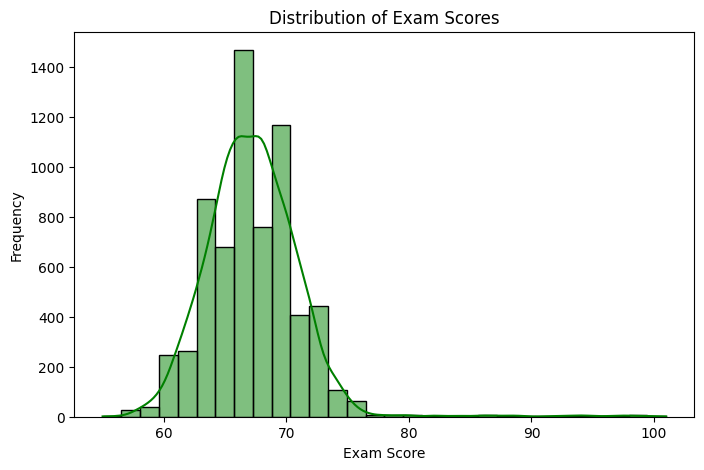

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Exam_Score'], bins=30, kde=True, color='green')
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

# Relationship Between Features and Exam Score

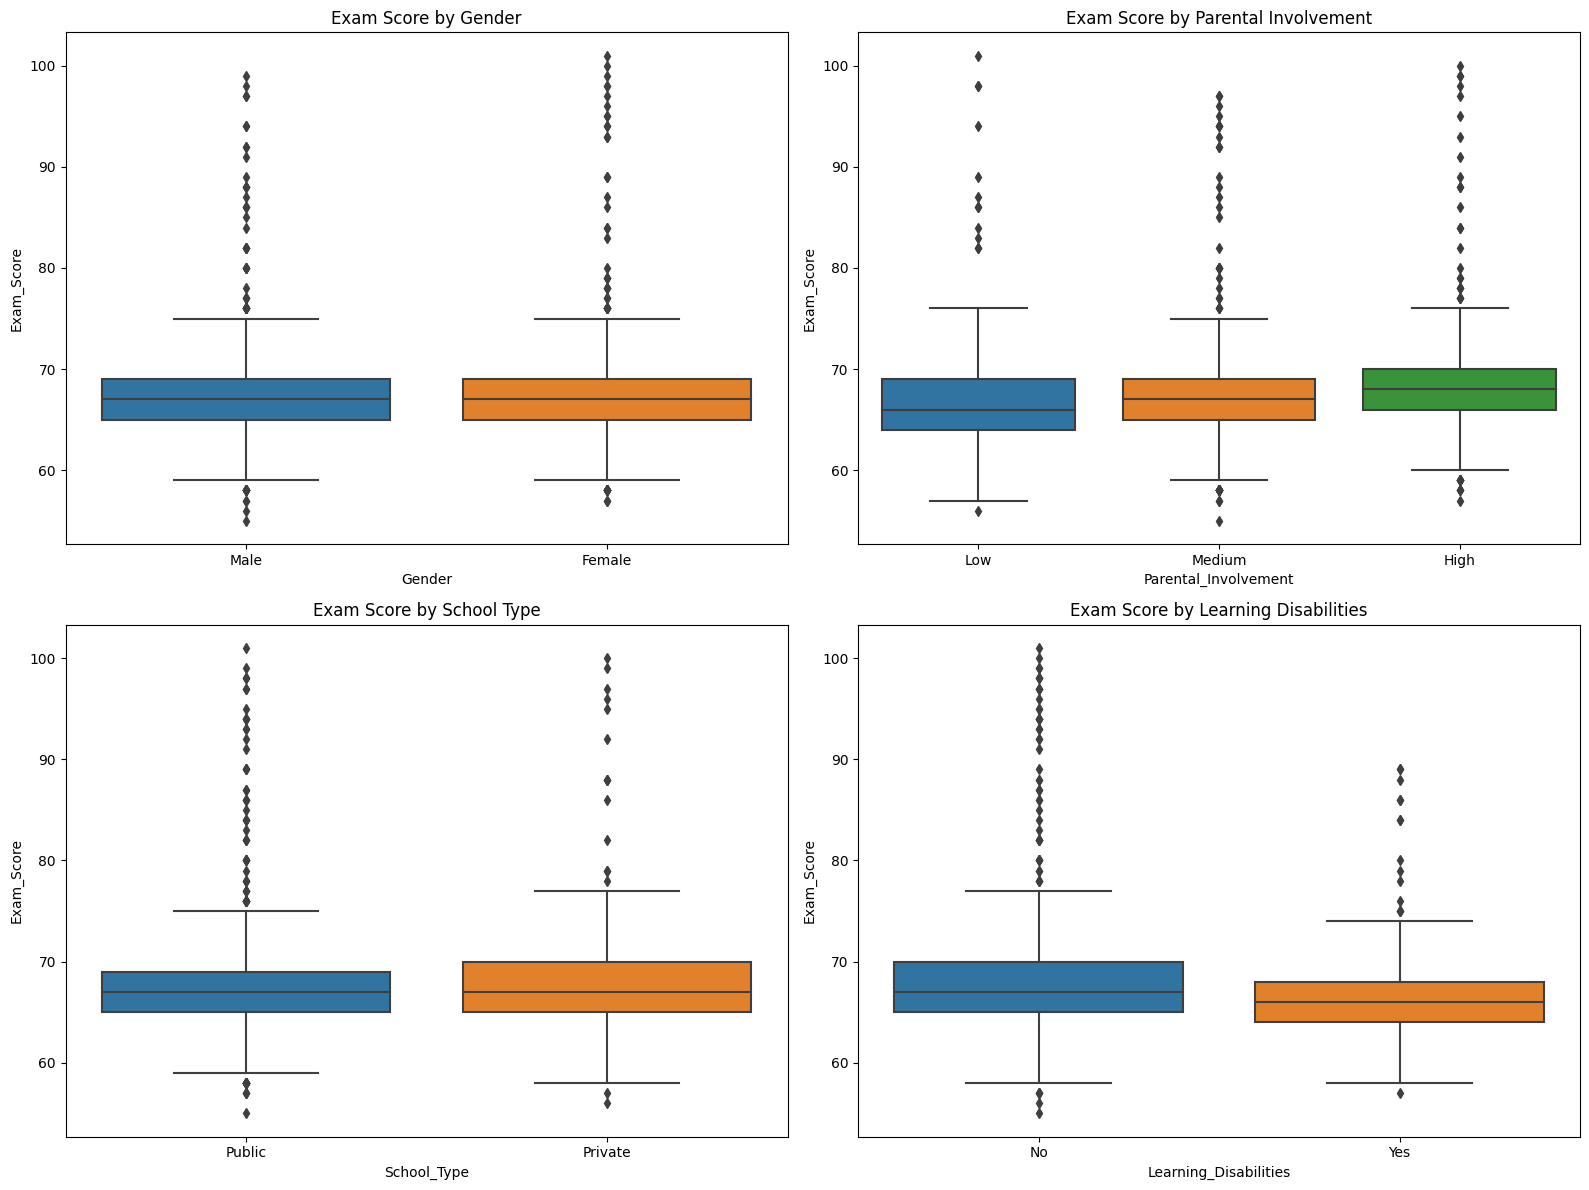

In [17]:
plt.figure(figsize=(16, 12))

# Gender vs Exam Score
plt.subplot(2, 2, 1)
sns.boxplot(x='Gender', y='Exam_Score', data=df)
plt.title("Exam Score by Gender")

# Parental Involvement
plt.subplot(2, 2, 2)
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title("Exam Score by Parental Involvement")

# School Type
plt.subplot(2, 2, 3)
sns.boxplot(x='School_Type', y='Exam_Score', data=df)
plt.title("Exam Score by School Type")

# Learning Disabilities
plt.subplot(2, 2, 4)
sns.boxplot(x='Learning_Disabilities', y='Exam_Score', data=df)
plt.title("Exam Score by Learning Disabilities")

plt.tight_layout()
plt.show()

 # Encode Categorical Columns

In [18]:
df_encoded = df.copy()
cat_cols = df_encoded.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Define Features (X) and Target (y)

In [19]:
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

# Scale the Numeric Features

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data into Train and Test Sets



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train The Model Decision Tree Regressor

In [22]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

# Prediction

In [23]:

y_pred = model.predict(X_test)

# Evaluation Metrics

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:
MAE:  1.70
MSE:  10.24
RMSE: 3.20
R² Score: 0.28


# Visualize Prediction vs Actual

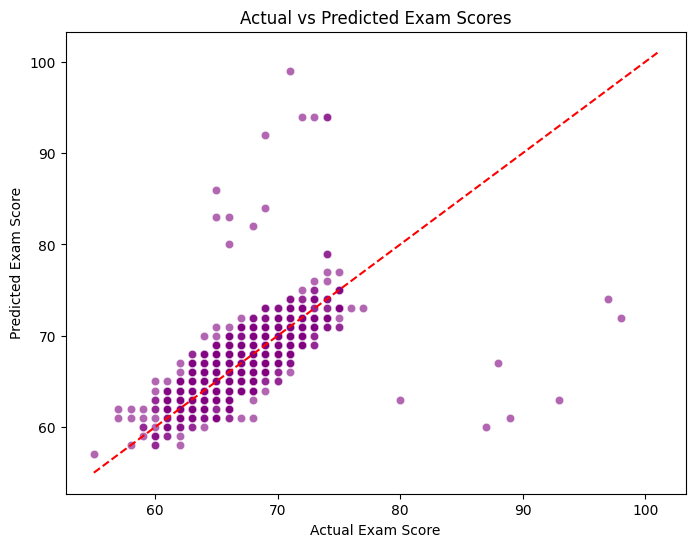

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()